# Volume 1: K-Means Clustering.
    <Name>
    <Class>
    <Date>

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
plt.rcParams["figure.dpi"] = 200

## Problem 1

Write a `KMeans` class for doing basic $k$-means clustering.
Implement the following methods, following `sklearn` class conventions.
1. `__init__()`: Accept a number of clusters $k$, a maximum number of iterations, and a convergence tolerance.
Store these as attributes.

2. `fit()`: Accept an $m \times n$ matrix $X$ of $m$ data points with $n$ features.
Choose $k$ random rows of $X$ as the initial cluster centers.
Run the $k$-means iteration until consecutive centers are within the convergence tolerance, or until iterating the maximum number of times.
Save the cluster centers as attributes.
If a cluster is empty, reassign the cluster center as a random row of $X$.
Return `self` after completing this process.

3. `predict()`: Accept an $l \times n$ matrix $X$ of data.
Return an array of $l$ integers where the $i$th entry indicates which cluster center the $i$th row of $X$ is closest to.

Test your class on the iris data set (`sklean.datasets.load_iris()`) after reducing the data to two principal components (with `sklearn.decomposition.PCA`).
Plot the data, coloring by cluster. It should look similar to the graphs in the lab.

In [4]:
class KMeans:
    """Basic k-means clustering class."""
    def __init__(self, n_clusters=8, max_iter=100, tol=1e-5, p=2, normalize=False):
        """Store clustering algorithm parameters.
        
        Parameters:
            n_clusters (int): How many clusters to compute.
            max_iter (int): The maximum number of iterations to compute.
            tol (float): The convergence tolerance.
            p (float): The norm to use
            normalize (bool): Whether to normalize the centers at each step
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.p = p
        self.normalize = normalize
    
    def fit(self, X, y=None):
        """Compute the cluster centers from random initial conditions.
        
        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        """
        self.cluster_centers = X[np.random.choice(X.shape[0], size = self.n_clusters, replace = False)]
        # print(self.cluster_centers)

        
        for i in range(self.max_iter):
            # print(i)
            prev_cluster_centers = self.cluster_centers
            clusters = [[] for center in self.cluster_centers]
            # append each point to the closest cluster
            for point in X:
                # print(point)
                index_closest = 0
                for j  in range(len(self.cluster_centers)):
                    # print(f'norm of {point} and {self.cluster_centers[j]}:')
                    # print(np.linalg.norm(point -self.cluster_centers[j]))
                    # print(f'and norm of {point} and {self.cluster_centers[index_closest]}')
                    if np.linalg.norm(point - self.cluster_centers[j], ord = self.p) < np.linalg.norm(point -self.cluster_centers[index_closest], ord = self.p):
                        index_closest = j
                clusters[index_closest].append(point)
            
            # if any cluster is empty, initialize it's center as a random point in the data
            for cluster in clusters:
                if len(cluster) == 0:
                    cluster.append(np.random.choice(X))
            

            self.cluster_centers = [np.mean(np.array(cluster), axis = 0) for cluster in clusters]
            if(self.normalize):
                self.cluster_centers = [center/np.linalg.norm(center) for center in self.cluster_centers]
            retrun = True
            for i in range(len(self.cluster_centers)):
                if(np.linalg.norm(self.cluster_centers[i] - prev_cluster_centers[i], ord = self.p) > self.tol):
                    retrun = False
            if retrun:
                print("returning early")
                return self
        return self
    
    def predict(self, X):
        """Classify each entry of X based on which cluster center it belongs to.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        
        Returns:
            ((n_samples) ndarray): Integer labels from 0 to n_clusters-1 for each entry of X.
        """
        closest = []
        for point in X:
            closest.append(0)
            for i in range(len(self.cluster_centers)):
                if(np.linalg.norm(self.cluster_centers[i] - point, ord = self.p) < np.linalg.norm(self.cluster_centers[closest[-1]] - point, ord = self.p)):
                    closest[-1] = i
        
        return np.array(closest)

                
        raise NotImplementedError("Problem 1 Incomplete")
    
    def fit_predict(self, X, y=None):
        """Fit to the data and return the resulting labels.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        """

        return self.fit(X).predict(X)

In [5]:
#run this cell to get the iris data
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = PCA(n_components=2).fit_transform(iris.data)

returning early


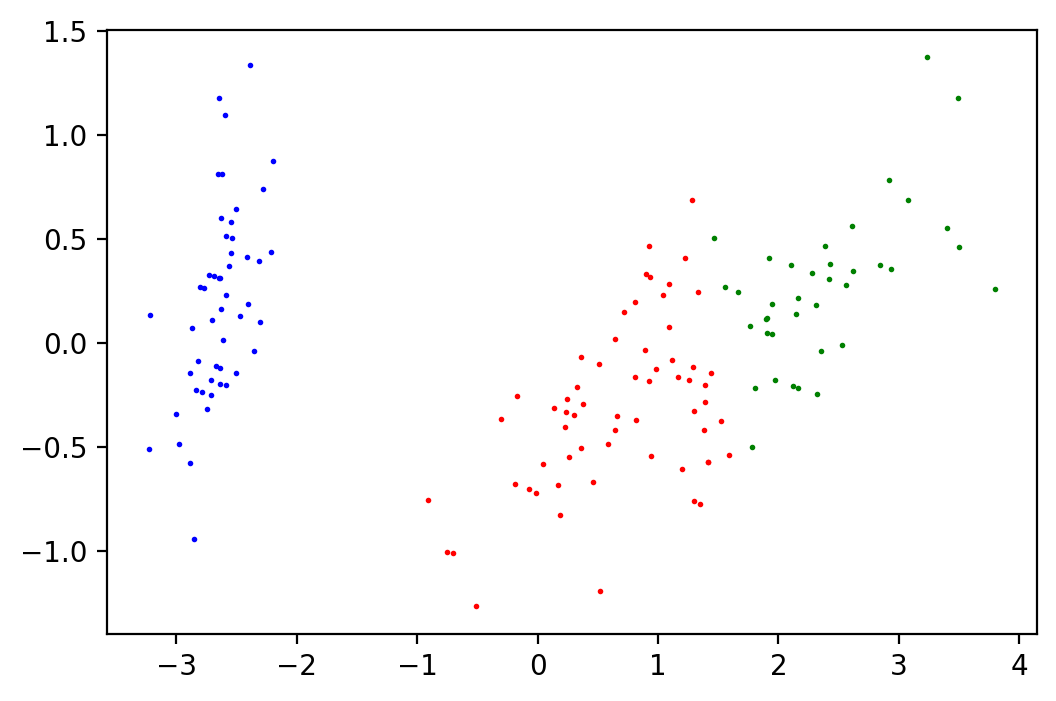

In [6]:
kmeans_class = KMeans(n_clusters= 3, p = 3)
kmeans_class.fit(iris_data)
clusters = kmeans_class.predict(iris_data)
# print(clusters)

mask0 = clusters == 0
# print(mask0)
mask1 = (clusters == 1)
mask2 = (clusters == 2)
cluster0 = iris_data[mask0]
#print(cluster0)
cluster1 = iris_data[mask1]
cluster2 = iris_data[mask2]
plt.scatter(cluster0[:,0], cluster0[:,1], color = 'b', s = 1)
plt.scatter(cluster1[:,0], cluster1[:,1], color = 'r', s = 1)
#right here I would print out cluster2[:,0] and cluster1[:,1]
# print(cluster2[:,0])
# print(cluster2[:,1])
plt.scatter(cluster2[:,0], cluster2[:,1], color = 'g', s = 1)
# plt.plot(iris_data[:,0], iris_data[:,1], '.')
plt.show()
# plt.plot(kmeans_class.cluster_centers[:,0], kmeans_class.cluster_centers[:,1], '+')


## Problem 2

Modify `KMeansfit()` to take in a paramter `p` which gives us the norm to be used. 

Import and parse the Sacramento housing data.
1. Use your `KMeans` class with a chosen `norm` on the housing data, let n=12.
2. Experiment with different norms.
3. Plot the data, coloring by cluster.
Also mark the cluster centers.
In a Markdown cell explain which norm is best for decreasing the longest distance to farthest home.

[[   4.9          12.            6.56648452 ...    2.83424408
    38.72       -121.24      ]
 [   5.3451       14.            6.1537037  ...    2.82777778
    38.73       -121.26      ]
 [   5.419         6.            6.69255151 ...    2.76862124
    38.73       -121.28      ]
 ...
 [   5.3064       15.            6.42358491 ...    2.88679245
    38.66       -121.79      ]
 [   4.8226       18.            6.58970359 ...    2.975039
    38.66       -121.78      ]
 [   4.1997       17.            5.73275862 ...    3.08836207
    38.66       -121.76      ]]


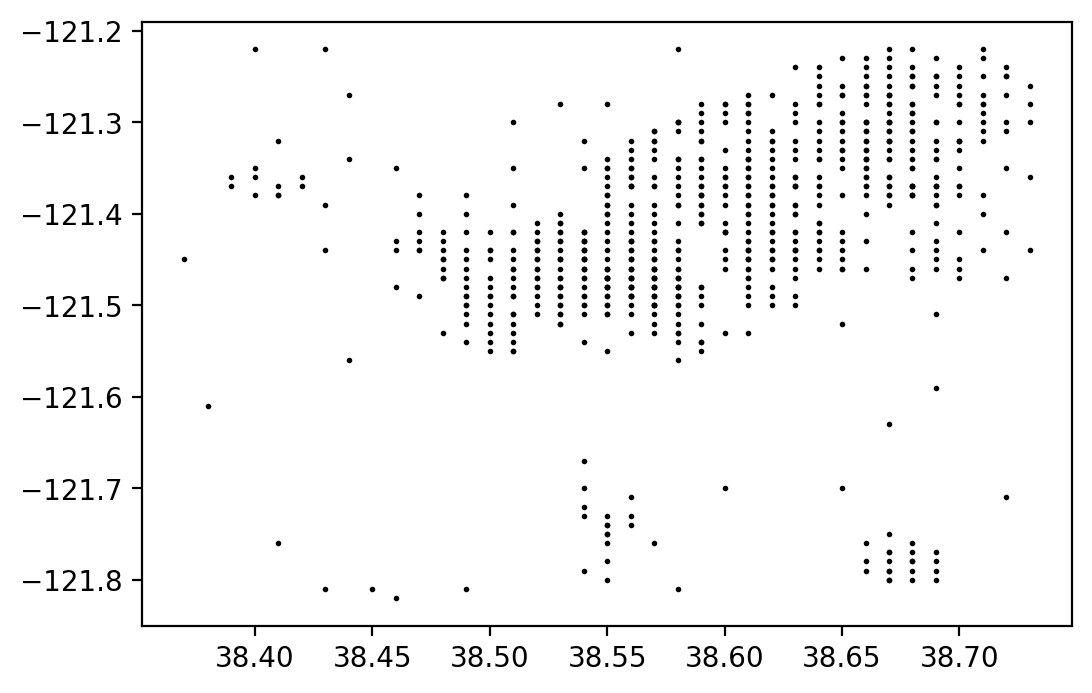

returning early
cluster_centers: [array([  38.66952381, -121.35369048]), array([  38.62      , -121.42769231]), array([  38.67608696, -121.77434783]), array([  38.56689076, -121.48579832]), array([  38.55090909, -121.40506494]), array([  38.50098901, -121.48087912]), array([  38.53208333, -121.755     ]), array([  38.591875, -121.3255  ]), array([  38.67698925, -121.27225806]), array([  38.694, -121.442]), array([  38.675 , -121.5625]), array([  38.4185, -121.351 ])]


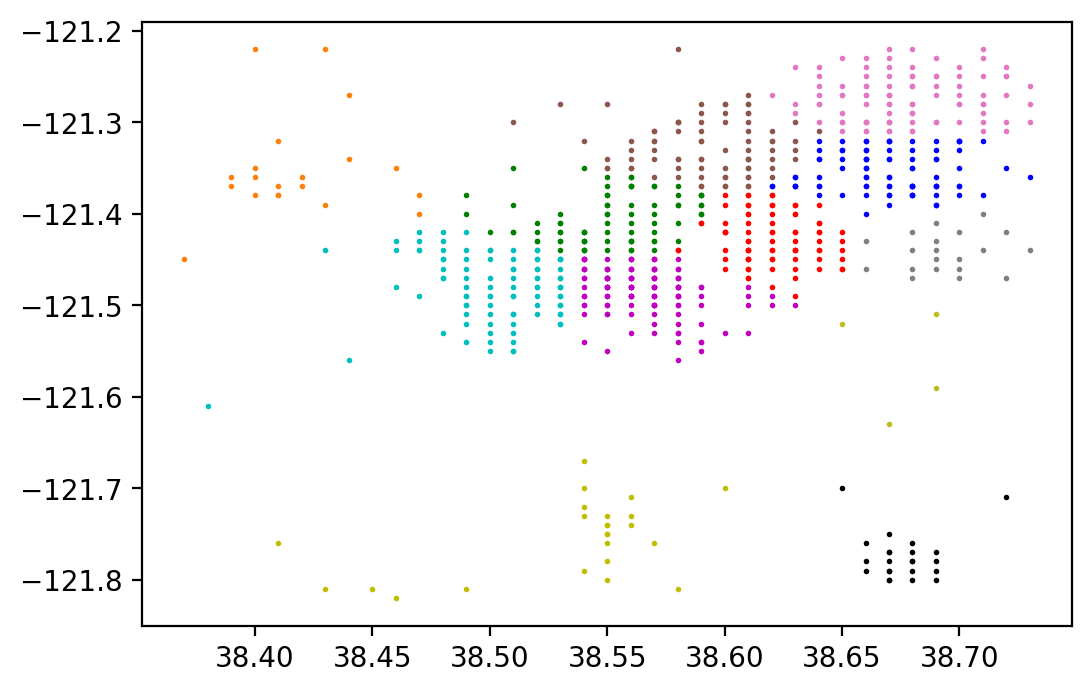

In [7]:
housing_stats = np.load("sacramento.npy")
print(housing_stats[:, :])
plt.scatter(housing_stats[:, 6], housing_stats[:, 7], color = 'k', s = 1)
plt.show()
kmeans_class = KMeans(n_clusters = 12, max_iter = 1000, p = 2, tol = 1e-100)
kmeans_class.fit(housing_stats[:, 6:])
clusters = kmeans_class.predict(housing_stats[:, 6:])
print("cluster_centers:", kmeans_class.cluster_centers)
mask0 = clusters == 0
# print(mask0)
colors = ['b', 'r', 'k', 'm', 'g', 'c', 'y', "tab:brown", 'tab:pink', 'tab:gray', 'tab:olive', 'tab:orange', 'lavender', 'lightsteelblue', 'royalblue']
masks = []
for i in range(12):
	masks.append(clusters == i)

clusters = []
for i in range(12):
	clusters.append(housing_stats[masks[i]])

for i in range(12):
	plt.scatter(clusters[i][:,6], clusters[i][:,7], color = colors[i], s = 1)


plt.show()

Give your explaination here

## Problem 3

Modify `KMeans.fit()` so that if `normalize` is `True`, the cluster centers are normalized at each iteration.

Cluster the earthquake data in three dimensions by converting the data from spherical coordinates to euclidean coordinates on the sphere.
1. Convert longitude and latitude to radians, then to spherical coordinates.
(Hint: `np.deg2rad()` may be helpful.)
2. Convert the spherical coordinates to euclidean coordinates in $\mathbb{R}^3$.
3. Use your `KMeans` class with normalization to cluster the euclidean coordinates.
4. Translate the cluster center coordinates back to spherical coordinates, then to degrees.
5. Plot the data, coloring by cluster.
Also mark the cluster centers.

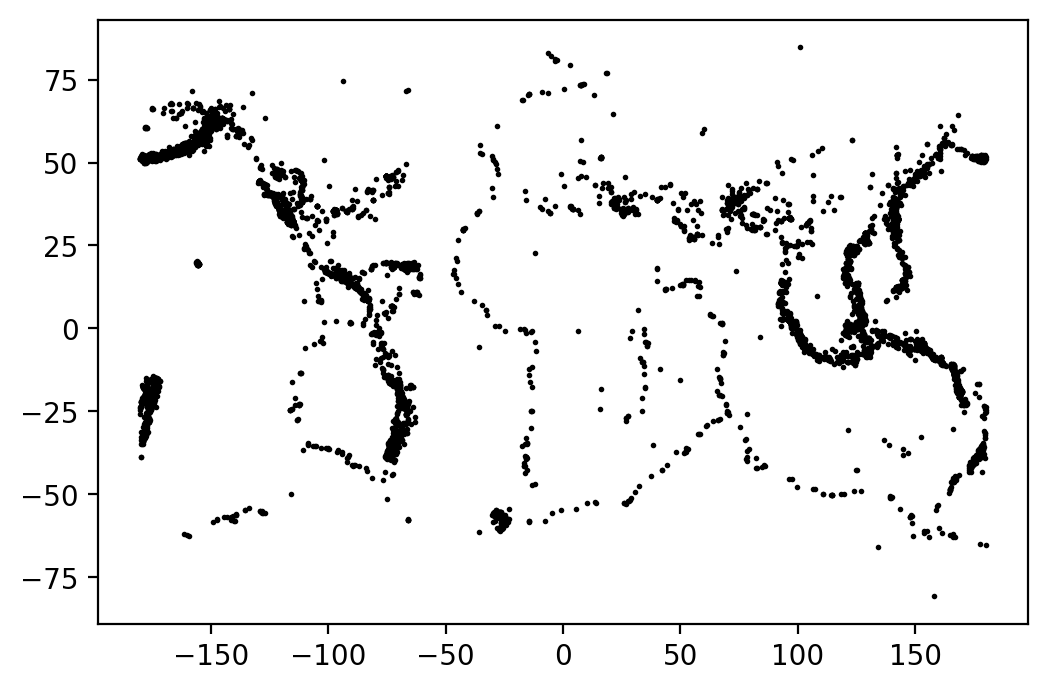

returning early
cluster centers:  [[ 131.95443183   77.93991744]
 [  95.53312039   86.78648279]
 [-155.56480711   70.46803976]
 [ -66.17735744   71.43956648]
 [-121.05758452  133.00129736]
 [ -72.80997796  125.55088916]
 [ -70.45983261  107.90545901]
 [  50.94124781   51.85481621]
 [-120.8129127    48.2960823 ]
 [  -8.95851443  139.0646697 ]
 [-115.57490824   57.25276643]
 [ -91.88685817   77.25223311]
 [ 171.4796645   112.06050277]
 [-167.99903578   33.3111215 ]
 [ -85.01425135   47.75763749]]
[[127.121  84.973]
 [125.554  76.313]
 [151.592  43.262]
 ...
 [144.722  76.99 ]
 [119.009  98.424]
 [125.024  67.04 ]]
[[ 99.866  63.71 ]
 [ 83.791  59.354]
 [ 69.345 112.874]
 ...
 [ 93.909  56.617]
 [100.057  90.581]
 [ 93.529  51.413]]
[[-179.947  114.563]
 [-175.407  109.987]
 [-174.715  108.203]
 [-173.381  105.492]
 [-179.135  121.588]
 [-178.977  110.959]
 [-178.915  119.808]
 [-178.383  108.185]
 [-178.419  111.417]
 [-155.44    70.63 ]
 [-155.863   70.504]
 [-174.564  111.508]
 [-176.9

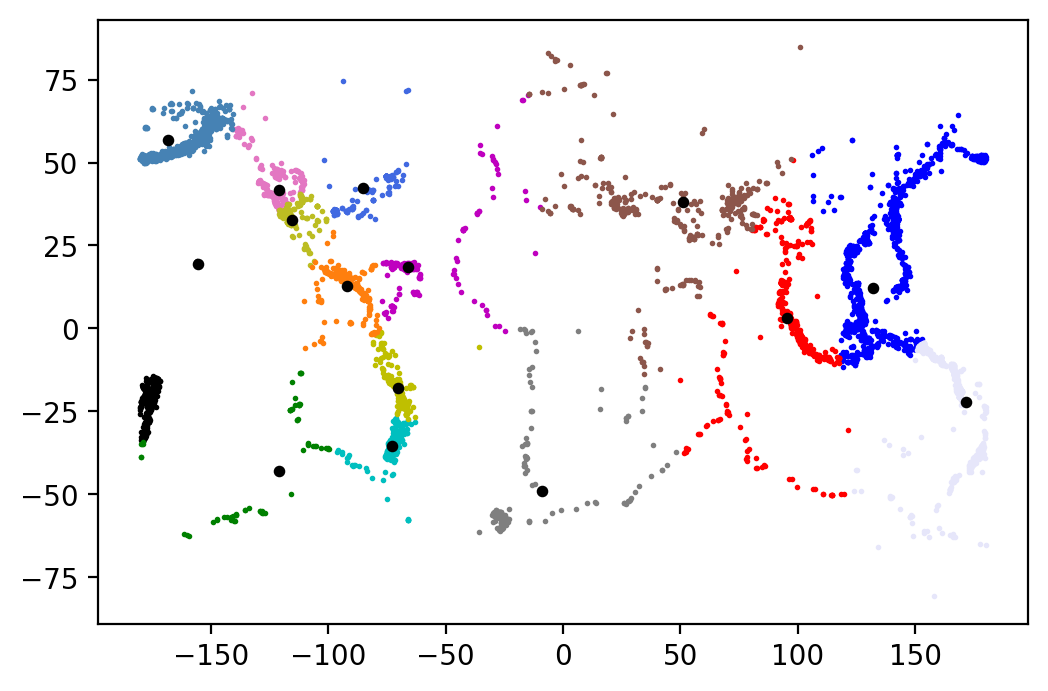

In [11]:
earthquakes = np.load("earthquake_coordinates.npy")
plt.scatter(earthquakes[:,0], earthquakes[:,1], color = 'k', s =1)
plt.show()
earthquakes = np.array([[coor[0], 90 - coor[1]] for coor in earthquakes])
earthquakes_rad = np.deg2rad(earthquakes)
# print(earthquakes, earthquakes_rad)

# plt.show()
spherical = np.array([[coor[0], coor[1]] for coor in earthquakes_rad])
# print(spherical)
euclidian = np.array([[np.cos(coor[0])*np.sin(coor[1]), np.sin(coor[0]) * np.sin(coor[1]), np.cos(coor[1])] for coor in spherical])
# print(euclidian)
kmeans_class = KMeans(n_clusters=15, normalize = True)
kmeans_class.fit(euclidian)
centers = kmeans_class.cluster_centers

# convert centers back to long and lat
spherical = np.array([[np.arctan2(coor[1], coor[0]), np.arccos(coor[2])] for coor in centers])
longlat = np.rad2deg(spherical)
# longlat = np.array([[coor[0], coor[1] - 90] for coor in longlat])
print("cluster centers: ", longlat)

kmeans_class.cluster_centers = longlat
clusters = kmeans_class.predict(earthquakes)
#print(clusters)


# plot the data
colors = ['b', 'r', 'k', 'm', 'g', 'c', 'y', "tab:brown", 'tab:pink', 'tab:gray', 'tab:olive', 'tab:orange', 'lavender', 'steelblue', 'royalblue']
masks = []
for i in range(15):
	masks.append(clusters == i)
	# print(masks[-1])

clusters = []
for i in range(15):
	clusters.append(earthquakes[masks[i]])
	print(clusters[-1])

for i in range(15):
	plt.scatter(clusters[i][:,0], -clusters[i][:,1] + 90, color = colors[i], s = 1)
plt.scatter(longlat[:,0], -longlat[:,1] + 90, color = 'k', s = 10, marker = 'o')
plt.show()

## Problem 4

Write a function that accepts an image array (of shape $(m,n,3)$), an integer number of clusters $k$, and an integer number of samples $S$.
Reshape the image so that each row represents a single pixel.
Choose $S$ pixels to train a $k$-means model on with $k$ clusters.
Make a copy of the original picture where each pixel has the same color as its cluster center.
Return the new image.
For this problem, you may use `sklearn.cluster.KMeans` instead of your `KMeans` class.

Test your function on some of the provided NASA images.

In [12]:
import sklearn

In [9]:
def quantize_image(im, n_clusters=4, n_samples=50):
    """Cluster the pixels of the image 'im' by color.
    Return a copy of the image where each pixel is replaced by the value
    of its cluster center.
    
    Parameters:
        im ((m,n,3) ndarray): an image array.
        n_clusters (int): the number of k-means clusters.
        n_samples (int): the number of pixels to train the k-means model on.
    
    Returns:
        ((m,n,3) ndarray): the quantized image.
    """
    
    raise NotImplementedError("Problem 4 Incomplete")